Test of STARS module, noise now put in function. Helper functions to get $\mu_*$ and $h$ added.

In [1]:
import numpy as np
import dfo

In [2]:
def tfun(x,var=1E-4):
    return np.dot(x[0:2],x[0:2])+1E-2*np.random.randn(1)

dim=10
xinit=200*np.random.rand(dim)-100
#my nasty initial condition, but all others will plateau
#xinit[0]=100
#xinit[1]=.1
##setup
print(tfun(xinit))

[15517.22789571]


In [3]:
mu_star=dfo.get_mu_star(1E-4,2,10)
h=dfo.get_h(2,10)

x=np.copy(xinit)
maxit=400
xhist=np.copy(x)
fhist=tfun(x)
for i in range(maxit):
    [x,f,y,fy]=dfo.STARS(x,tfun,mu_star,h)
    xhist=np.vstack((xhist,x))
    fhist=np.hstack((fhist,f))
    if 'yhist' in locals():
        yhist=np.vstack((yhist,y))
        ghist=np.hstack((ghist,fy))
    else:
        yhist=np.copy(y)
        ghist=np.copy(fy)
        
 

n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.


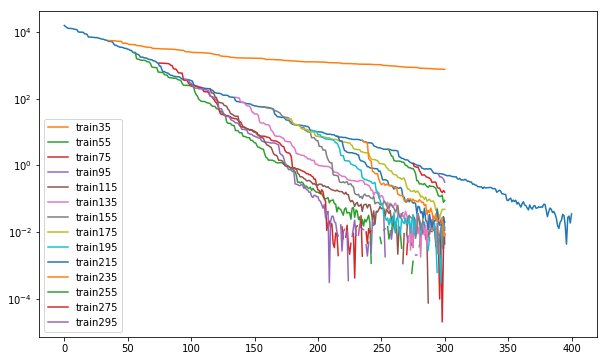

[[4.00002767e+00]
 [3.99946580e+00]
 [6.70988979e-02]
 [1.48941561e-05]
 [1.10230564e-05]
 [6.37332192e-06]
 [4.78888771e-06]
 [2.74893188e-06]
 [7.01754079e-07]
 [3.17462739e-08]]
[[ 9.93085873e-01  1.17387300e-01]
 [-1.17388349e-01  9.93084274e-01]
 [-4.33625174e-04 -1.44642006e-03]
 [ 3.67055016e-04  3.83149254e-04]
 [-2.53782824e-05 -5.42323002e-04]
 [ 2.50215240e-04 -7.59873654e-05]
 [-8.47343265e-05 -5.47605411e-04]
 [-9.73487678e-05  2.09563086e-04]
 [-5.08533031e-05 -9.75355412e-04]
 [ 1.39148058e-04  1.12624437e-04]]


In [16]:
import active_subspaces as ac
import matplotlib.pyplot as plt
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mu_star(1E-4,2,3)
h=dfo.get_h(2,3)
plt.figure(figsize=(10,6))
plt.semilogy(fhist)

for tr_stop in range(35,300,20):


    trainx=np.vstack((xhist[0:tr_stop,:],yhist[0:tr_stop,:]))
    trainf=np.hstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    trainf=np.reshape(trainf,(trainf.size,1))


# Instantiate a subspace object


# Use Local Linears
#df = ac.gradients.local_linear_gradients(x_hist, f_hist) #Estimated gradients using local linear models
#ss.compute(df=df, nboot=0)
    
# Use Global Quadratic
    ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')


    sub=ss.eigenvecs[:,0:3]
#    print(sub)
#    print(ss.eigenvecs[0:4])
#print(ss.eigenvals)

    x4=np.copy(xhist[tr_stop-1,:])
    xhist4=np.copy(x4)
    fhist4=tfun(x4)
#active=np.eye(dim)
    active=sub.transpose()
#print(active)
    for i in range(300-tr_stop):
        [x4,f,temp,temp2]=dfo.STARS(x4,tfun,mu_star,h,active=active)
        xhist4=np.vstack((xhist4,x4))
        fhist4=np.hstack((fhist4,f))
    plt.semilogy(range(tr_stop,301),fhist4,label='train'+str(tr_stop))
plt.legend()
plt.show()
print(ss.eigenvals)
print(ss.eigenvecs[:,0:2])

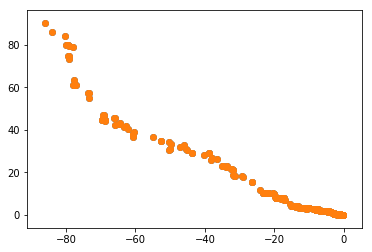

In [15]:
plt.scatter(xhist[:,0],xhist[:,1])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.semilogy(range(tr_stop,tr_stop+301),fhist4)
plt.semilogy(fhist)
plt.show()



In [ ]:
    
x2=np.copy(xinit)
x2hist=np.copy(x2)
f2hist=tfun(x2)
mu_star=dfo.get_mu_star(1E-4,2,1)
h=dfo.get_h(2,1)
u=np.zeros(dim)
u[0:2]=1
u*=1/np.sqrt(2)
for i in range(maxit):
    [x2,f,temp,temp2]=dfo.STARS_RV(x2,tfun,u,mu_star,h)
    x2hist=np.vstack((x2hist,x2))
    f2hist=np.hstack((f2hist,f))

In [ ]:
mu_star=dfo.get_mu_star(1E-4,2,2)
h=dfo.get_h(2,2)
x3=np.copy(xinit)
xhist3=np.copy(x3)
fhist3=tfun(x3)
active=np.eye(dim)
active=active[0:2,:]
print(active)
for i in range(maxit):
    [x3,f,temp1,temp2]=dfo.STARS(x3,tfun,mu_star,h,active=active)
    xhist3=np.vstack((xhist3,x3))
    fhist3=np.hstack((fhist3,f))

In [ ]:
mu_star=dfo.get_mu_star(1E-4,2,2)
h=dfo.get_h(2,2)
x4=np.copy(xhist[70,:])
xhist4=np.copy(x4)
fhist4=tfun(x4)
active=np.eye(dim)
active=active[0:2,:]
print(active)
for i in range(maxit-70):
    [x4,f,temp,temp2]=dfo.STARS(x4,tfun,mu_star,h,active=active)
    xhist4=np.vstack((xhist4,x4))
    fhist4=np.hstack((fhist4,f))

In [ ]:
import matplotlib.pyplot as plt
plt.semilogy(fhist,label='stars_full')
plt.semilogy(f2hist,label='stars_onedir')
plt.semilogy(fhist3,label='stars_active')
plt.semilogy(fhist4,label='stars_learn')
plt.legend()
plt.show()
print(f2hist)

In [ ]:
#plt.scatter(xhist[0],xhist[1])
plt.scatter(x2hist[:,0],x2hist[:,1])
plt.scatter(xhist3[:,0],xhist3[:,1])

print(x2hist[0])
print(x2hist[1])
print(x2hist[-1])

plt.show()


